<h1 style="font-size:2.5em; color:#f5a442;">Machine Learning [4483] Project: A second
hand car price prediction
system with additional trends and
insights</h1>

<h2 style="font-size:1.5em; color:#808080;">Kai Broux (r0745431) and Luigi Guerriero (r0760424)</h2>
<h2 style="font-size:1.0em; color:#808080;">Master's students IIW UHasselt-KULeuven Campus Diepenbeek</h2>

# 1. Introduction

The goal of our project is to make a price prediction system for used cars and to extract interesting information and insights. The price prediction model and insights can be extracted from a dataset of different used cars. The model and insights could be then later used as a tool for a second-hand car retailer to give insights to potential customers shopping for a second-hand car. Moreover, this price prediction model and insights tool may also come in handy for a customer looking to sell his/her car.

This [`dataset`](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes) contains data from 100 000 used cars from the UK which are divided into separate brands. Each brand is divided into a separate file and contains information about the model, year, price, transmission, mileage, fuel type, road tax, mpg and engine size.

Before we begin with the project, we need to import all libraries required for this project. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting. In this assignment, we will also use [`scipy`](https://docs.scipy.org/doc/scipy/reference/), which contains scientific and numerical computation functions and tools. 

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# used for importing .csv data
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# Optimization module in scipy
from scipy import optimize

# For determining R2
from sklearn.metrics import r2_score

# Tools for extracting how much features and which features we need
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import scipy

import seaborn as sbn

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# 2. Project itself

###  2.1 Loading in the data

As mentioned in the introduction a separate file of a car brand is stored in a `.csv` file and consist of the following columns:

    Model: Model type.
    Year: Registration Year.
    Price: Price in euros.
    Transmission: Type of Gearbos.
    Mileage: Distance Used.
    FuelType: Engine Fuel.
    Tax: Road Tax.
    mpg: Miles per Gallon.
    EngineSize: Size in litres.
    Brand: Name of the car brand.

Because the dataset also includes an abundance of information of a specefic car model, we will leave them outside of the dataset and only consider a brand with different models. Therefore we will leave out the `cclass.csv` and `focus.csv` files.

To load in the dataset, we first have to load in the separate `.csv` files. 

In [2]:
audi = pd.read_csv("dataset/audi.csv")
bmw = pd.read_csv("dataset/bmw.csv")
ford = pd.read_csv("dataset/ford.csv")
hyundai = pd.read_csv("dataset/hyundi.csv")
mercedes = pd.read_csv("dataset/merc.csv")
skoda = pd.read_csv("dataset/skoda.csv")
toyota = pd.read_csv("dataset/toyota.csv")
vauxhall = pd.read_csv("dataset/vauxhall.csv")
volkswagen = pd.read_csv("dataset/vw.csv")

We are having different datasets for different brands. So if we want to combine them we need to add an extra column to each `.csv` file describing the name of the brand :

In [3]:
audi['brand'] = 'audi'
bmw['brand'] = 'bmw'
ford['brand'] = 'ford'
hyundai['brand'] = 'hyundai'
mercedes['brand'] = 'mercedes'
skoda['brand'] = 'skoda'
toyota['brand'] = 'toyota'
vauxhall['brand'] = 'vauxhall'
volkswagen['brand'] = 'volkswagen'

df = pd.concat([audi,bmw,
               ford,hyundai,mercedes,skoda,toyota,
               vauxhall,volkswagen])
# drop the tax column
df.drop('tax(¬£)',axis=1,inplace=True)
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...     ...   ...    ...          ...      ...      ...    ...   ...   
15152   Eos  2012   5990       Manual    74000   Diesel  125.0  58.9   
15153   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
15154   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
15155   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
15156   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

       engineSize       brand  
0             1.4        audi  
1             2.0        audi  
2             1.4        audi  
3             2.0        audi  
4             1.0        audi  
...           ...         ...  
15152         2.0  volkswagen  
15153         1.2  volkswagen  
15154         1.4  volkswagen  
15155         1.2  volkswagen  
15156         1.2  volkswagen  

[99187 rows x 10 columns]

### 2.2 Lineair regression with one variable 

To start of simply, we are going to apply linear regression with one variable to determine the price of a Mercedes C-class, more specefic the W205 model. We can use the `cclass.csv` and only look to at the the C-class from years 2014-2021.

We have to first load the dataset:

In [4]:
cclass = pd.read_csv("dataset/cclass.csv")
display(cclass)

model  year  price transmission  mileage fuelType  engineSize
0      C Class  2020  30495    Automatic     1200   Diesel         2.0
1      C Class  2020  29989    Automatic     1000   Petrol         1.5
2      C Class  2020  37899    Automatic      500   Diesel         2.0
3      C Class  2019  30399    Automatic     5000   Diesel         2.0
4      C Class  2019  29899    Automatic     4500   Diesel         2.0
...        ...   ...    ...          ...      ...      ...         ...
3894   C Class  2017  14700       Manual    31357   Diesel         1.6
3895   C Class  2018  18500    Automatic    28248   Diesel         2.1
3896   C Class  2014  11900       Manual    48055   Diesel         2.1
3897   C Class  2014  11300    Automatic    49865   Diesel         2.1
3898   C Class  2014  14800    Automatic    55445   Diesel         2.1

[3899 rows x 7 columns]

First take a look at our price density to figure out if we have to trim the data:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

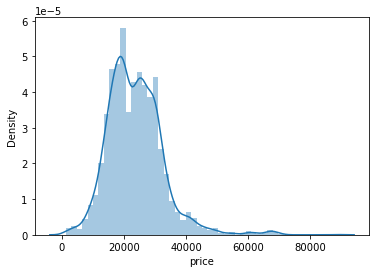

In [5]:
sbn.distplot(cclass["price"])

There are a lot of outliers above the 50000 price that do not respresent the majority of the data. So we filter out the c-classes ranging from 0-50000:

Since we want to examine the C-class W205 model we have to filter out the C-classes that are not in the 2014-2021 year-range: 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

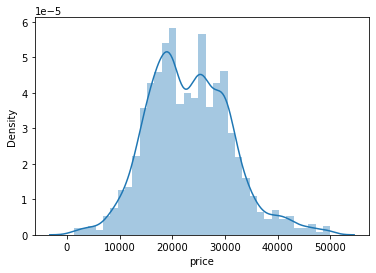

In [6]:
cclass = cclass.loc[(cclass['price'] >= 0) & (cclass['price'] <= 50000)]
sbn.distplot(cclass["price"])

In [7]:
cclass = cclass[(cclass['year'] > 2016) & (cclass['year'] < 2022)]
display(cclass)
print(len(cclass))

model  year  price transmission  mileage fuelType  engineSize
0      C Class  2020  30495    Automatic     1200   Diesel         2.0
1      C Class  2020  29989    Automatic     1000   Petrol         1.5
2      C Class  2020  37899    Automatic      500   Diesel         2.0
3      C Class  2019  30399    Automatic     5000   Diesel         2.0
4      C Class  2019  29899    Automatic     4500   Diesel         2.0
...        ...   ...    ...          ...      ...      ...         ...
3889   C Class  2017  14200    Automatic    53528   Diesel         2.1
3891   C Class  2018  23600    Automatic    18834   Petrol         2.0
3892   C Class  2018  19900       Manual    31540   Petrol         2.0
3894   C Class  2017  14700       Manual    31357   Diesel         1.6
3895   C Class  2018  18500    Automatic    28248   Diesel         2.1

[2697 rows x 7 columns]

2697


For the lineair regression with one variable, we will choose the mileage as variable (for the x-axis). The price will be selected for the y-axis. We will then visualise the data. Following function can help us to quickly plot graphs:

In [8]:
def plotData(x, y):
    fig = pyplot.figure()  # open a new figure    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price of a W205 C-Class in ¬£')
    pyplot.xlabel('Mileage in miles')   

[ 1200  1000   500 ... 31540 31357 28248]


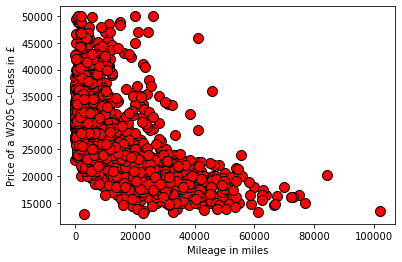

In [9]:
#X and y values of the entire dataset (for visualisation)
X_all = cclass['mileage'].to_numpy()
y_all = cclass['price'].to_numpy()
m_all = y_all.size #dataset size
print(X_all)

#Visualise data
plotData(X_all,y_all)

#### Splitting Data into CV, training and test set

In [10]:
cclass_shuffled = cclass.sample(frac=1)
cclass_shuffled.head()

model  year  price transmission  mileage fuelType  engineSize
2790   C Class  2019  31449    Semi-Auto     1000   Diesel         1.6
2644   C Class  2019  25599    Semi-Auto    12300   Petrol         1.5
3294   C Class  2019  26998    Automatic     8024   Petrol         1.6
2739   C Class  2019  19799    Semi-Auto    14262   Petrol         1.5
974    C Class  2017  19545    Semi-Auto    32000   Diesel         2.1

In [11]:
zero_60percent= int(len(cclass_shuffled)*0.6)
sixty_80percent = int(len(cclass_shuffled)*0.8)
hundred_percent = int(len(cclass_shuffled))
#print(zero_60percent)
#print(sixty_80percent)
#print(hundred_percent)
cclass_train = cclass_shuffled.iloc[0:zero_60percent]  #0-60%
cclass_CV = cclass_shuffled.iloc[zero_60percent:sixty_80percent] #20%: 60-80
cclass_test = cclass_shuffled.iloc[sixty_80percent:hundred_percent] #20%: 80-100
print(len(cclass_train),len(cclass_CV),len(cclass_test))

1618 539 540


In [99]:
#Load into X an Y
X = cclass_train['mileage'].to_numpy()
y = cclass_train['price'].to_numpy()
m = y.size #dataset size

X_CV = cclass_CV['mileage'].to_numpy()
y_CV = cclass_CV['price'].to_numpy()
m_CV = y_CV.size

X_test = cclass_test['mileage'].to_numpy()
y_test = cclass_test['price'].to_numpy()
m_test = y_test.size

#### Gradient descent  

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

We first want to normalize our features to make sure our gradient descent works out without any overflow problems. Besides we add a column of ones to X:

In [13]:
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma
print(X_norm)

[-1.00257689 -0.04833028 -0.40942395 ... -0.86881347  0.18533347
  0.1261364 ]


In [14]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).


X_not_norm = X  #save original X if we need it later
X_not_norm_stacked = np.stack([np.ones(m), X_not_norm], axis=1)  #column of ones to X
X  = np.stack([np.ones(m), X_norm], axis=1)                      #column of ones to the normalized X
print("A column of ones to X-normalized:\n", X)
print("\nA column of ones to not normalized X:\n",X_not_norm_stacked)


A column of ones to X-normalized:
 [[ 1.         -1.00257689]
 [ 1.         -0.04833028]
 [ 1.         -0.40942395]
 ...
 [ 1.         -0.86881347]
 [ 1.          0.18533347]
 [ 1.          0.1261364 ]]

A column of ones to not normalized X:
 [[1.0000e+00 1.0000e+03]
 [1.0000e+00 1.2300e+04]
 [1.0000e+00 8.0240e+03]
 ...
 [1.0000e+00 2.5840e+03]
 [1.0000e+00 1.5067e+04]
 [1.0000e+00 1.4366e+04]]


For the cost function we can define a function that determines the cost:

In [15]:
def computeCost(X, y, theta):
     
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    h= np.dot(X,theta)
    inner = (h-y)**2
    J = (1/(2*m)) * (np.sum(inner))

    return J

For Gradient descent we can define following function:

In [16]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history



We initialize the ùúÉ parameters to 0 and the learning rate ùõº to 0.01 and use the final parameters to plot the lineair fit:

In [17]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 100000
alpha = 1

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 26368.5056, -4039.0672


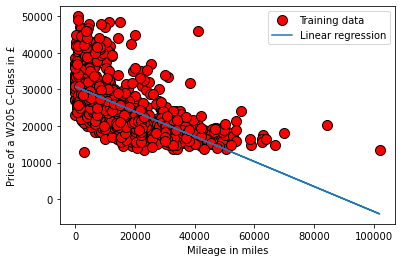

In [18]:
# plot the linear fit
plotData(X_not_norm_stacked[:, 1], y)
pyplot.plot(X_not_norm_stacked[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

## Regularised linear regression

In [19]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    
    # Initialize some useful values
    m = y.size # number of training examples
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    
    h= np.dot(X,theta)   
    J = (1/(2*m)) * (np.sum((h-y)**2)) + (lambda_/(2*m))*(np.sum(theta[1:]**2))   
    grad = (1 / m) * (h - y).dot(X)
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

    # ============================================================
    return J, grad

def trainLinearReg(linearRegCostFunction, X, y, lambda_=0.0, maxiter=200):
    """
    Trains linear regression using scipy's optimize.minimize.

    Parameters
    ----------
    X : array_like
        The dataset with shape (m x n+1). The bias term is assumed to be concatenated.

    y : array_like
        Function values at each datapoint. A vector of shape (m,).

    lambda_ : float, optional
        The regularization parameter.

    maxiter : int, optional
        Maximum number of iteration for the optimization algorithm.

    Returns
    -------
    theta : array_like
        The parameters for linear regression. This is a vector of shape (n+1,).
    """
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': maxiter}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x

#### Selecting $\lambda$ using a cross validation set

In [51]:
def validationCurve(X, y, Xval, yval):
    # Selected values of lambda (you should not change this)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    # ====================== YOUR CODE HERE ======================
    
    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        theta_t = trainLinearReg(linearRegCostFunction, X, y, lambda_ = lambda_try)
        error_train[i], _ = linearRegCostFunction(X, y, theta_t, lambda_ = 0)
        error_val[i], _ = linearRegCostFunction(Xval, yval, theta_t, lambda_ = 0)



    # ============================================================
    return lambda_vec, error_train, error_val

Since we haven't normalized out features from our cross validation set, we have to do it first before proceeding:

In [63]:
mu_CV = np.mean(X_CV, axis = 0)
sigma_CV = np.std(X_CV, axis = 0)
X_CV_norm = (X_CV - mu_CV) / sigma_CV
X_CV_norm_stacked  = np.concatenate([np.ones((y_CV.size,1)), X_CV_norm], axis=1)
print(X_CV_norm_stacked)
print(X_CV_norm.shape)
print(m_CV)

[[ 1.         -0.5836972 ]
 [ 1.         -0.88395887]
 [ 1.          1.1856625 ]
 ...
 [ 1.          0.18110745]
 [ 1.         -0.85234343]
 [ 1.          0.15399636]]
(539, 1)
539


lambda		Train Error	Validation Error
 0.000000	12791548.703089	13706054.112800
 0.001000	12791548.703092	13706053.776273
 0.003000	12791548.703117	13706053.103238
 0.010000	12791548.703401	13706050.747826
 0.030000	12791548.705893	13706044.019876
 0.100000	12791548.734244	13706020.492972
 0.300000	12791548.983411	13705953.452674
 1.000000	12791551.815081	13705720.902083
 3.000000	12791576.641948	13705074.328354
 10.000000	12791856.470957	13703017.246635


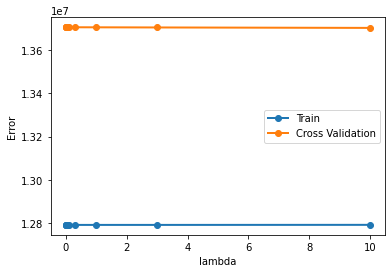

In [66]:
lambda_vec, error_train, error_val = validationCurve(X, y, X_CV_norm_stacked, y_CV)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

#### Regularised linear regression with our chosen $\lambda$ 

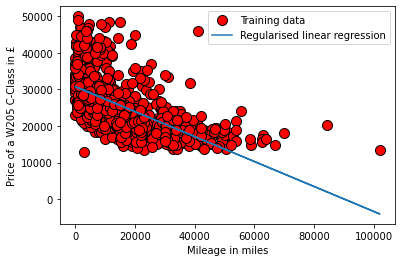

In [20]:
theta_regularized = trainLinearReg(linearRegCostFunction, X, y, lambda_=0)
# plot the linear fit
plotData(X_not_norm_stacked[:, 1], y)
pyplot.plot(X_not_norm_stacked[:, 1], np.dot(X, theta_regularized), '-')
pyplot.legend(['Training data', 'Regularised linear regression']);

In [21]:
y_pred = np.dot(X, theta_regularized)
#print(y_pred)
#print(y)
print("R¬≤ score of linear regression model: ",r2_score(y, y_pred))

R¬≤ score of linear regression model:  0.3893835091682588


### Learning curve

In [22]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    for i in range(1, m+1):
        theta_t = trainLinearReg(linearRegCostFunction, X[:i], y[:i], lambda_ = lambda_)
        error_train[i - 1], _ = linearRegCostFunction(X[:i], y[:i], theta_t, lambda_ = 0)
        error_val[i - 1], _ = linearRegCostFunction(Xval, yval, theta_t, lambda_ = 0)

        
    # =============================================================
    return error_train, error_val

We still need to add ones for the X_CV set

In [23]:
#mu_CV = np.mean(X_CV, axis = 0)
#sigma_CV = np.std(X_CV, axis = 0)
#X_CV_norm = (X_CV - mu_CV) / sigma_CV

X_CV_with_ones = np.stack([np.ones(m_CV), X_CV], axis=1)
print(X_CV_with_ones)
print(X_not_norm_stacked)

[[1.0000e+00 5.8560e+03]
 [1.0000e+00 2.3230e+03]
 [1.0000e+00 2.6675e+04]
 ...
 [1.0000e+00 1.4855e+04]
 [1.0000e+00 2.6950e+03]
 [1.0000e+00 1.4536e+04]]
[[1.0000e+00 1.0000e+03]
 [1.0000e+00 1.2300e+04]
 [1.0000e+00 8.0240e+03]
 ...
 [1.0000e+00 2.5840e+03]
 [1.0000e+00 1.5067e+04]
 [1.0000e+00 1.4366e+04]]


Plot learning curve for linear regression

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	139784614496.754761
  	2		175609361.699766	424646042.502842
  	3		151529883.788620	629179938.792593
  	4		132837043.150019	393733859.773682
  	5		126855865.174827	180877559.775056
  	6		226320731.628078	230301628.856693
  	7		223054507.582136	199458458.935804
  	8		189952129.383804	193722943.830837
  	9		183028801.083251	195366702.278083
  	10		185272629.608642	195475483.465114
  	11		175179337.533027	190978711.445859
  	12		165882671.404765	194650082.890666
  	13		195187131.032783	237210667.852896
  	14		193191787.470830	236027368.171165
  	15		210209898.812294	235986462.615098
  	16		201282786.892324	234411244.313120
  	17		203695609.028777	231115871.484299
  	18		195279715.611517	230232085.936630
  	19		208486935.622360	230538168.844621
  	20		218797130.608914	230235938.441252
  	21		210290858.804016	228953100.219736
  	22		213669301.010260	229393156.848375
  	23		215704326.317424	228651545.413420
  	24		226217704

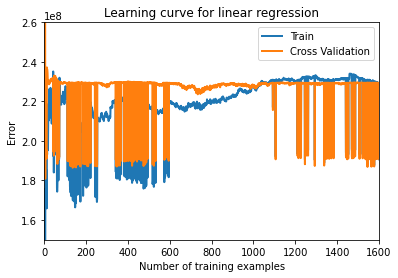

In [24]:
error_train, error_val = learningCurve(X_not_norm_stacked, y, X_CV_with_ones, y_CV, lambda_=0)
#error_train, error_val = learningCurve(X, y, X_CV_with_ones, y_CV, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 1600, 150000000, 260000000])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

## Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias).

In [25]:
def polyFeatures(X, p):
    """
    Maps X (1D vector) into the p-th power.
    
    Parameters
    ----------
    X : array_like
        A data vector of size m, where m is the number of examples.
    
    p : int
        The polynomial power to map the features. 
    
    Returns 
    -------
    X_poly : array_like
        A matrix of shape (m x p) where p is the polynomial 
        power and m is the number of examples. That is:
    
        X_poly[i, :] = [X[i], X[i]**2, X[i]**3 ...  X[i]**p]
    
    Instructions
    ------------
    Given a vector X, return a matrix X_poly where the p-th column of
    X contains the values of X to the p-th power.
    """
    # You need to return the following variables correctly.
    X_poly = np.zeros((X.shape[0], p))

    # ====================== YOUR CODE HERE ======================

    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)

    # ============================================================
    return X_poly

def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.
    Also works with linear regression.
    Plots the learned polynomial fit with power p and feature normalization (mu, sigma).

    Parameters
    ----------
    polyFeatures : func
        A function which generators polynomial features from a single feature.

    min_x : float
        The minimum value for the feature.

    max_x : float
        The maximum value for the feature.

    mu : float
        The mean feature value over the training dataset.

    sigma : float
        The feature standard deviation of the training dataset.

    theta : array_like
        The parameters for the trained polynomial linear regression.

    p : int
        The polynomial order.
    """
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # Plot
    pyplot.plot(x, np.dot(X_poly, theta), '--', lw=2)
    
    
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

#### Selecting our polynomial degree

In [104]:

# Selected values of lambda (you should not change this)
p_vec = [1,2,3,4,5,6]

# You need to return these variables correctly.
error_train = np.zeros(len(p_vec))
error_val = np.zeros(len(p_vec))

X_CV = np.array(X_CV).reshape(np.array(X_CV).size,1)

# ====================== YOUR CODE HERE ======================
for i in range(len(p_vec)):
    p_try = p_vec[i]
        
    #training
    X_not_norm__for_poly = np.array(X).reshape(np.array(X).size,1)
    X_not_norm_poly = polyFeatures(X_not_norm__for_poly, p_try)
    mu = np.mean(X_not_norm_poly, axis = 0)
    sigma = np.std(X_not_norm_poly, axis = 0)
    X_poly_norm = (X_not_norm_poly - mu) / sigma
    X_poly_norm_with_ones = np.concatenate([np.ones((y.size, 1)), X_poly_norm], axis=1)
        
    #CV
    X_poly_CV = polyFeatures(X_CV, p_try)
    mu_poly_CV = np.mean(X_poly_CV, axis = 0)
    sigma_poly_CV = np.std(X_poly_CV, axis = 0)
    X_poly_CV_norm = (X_poly_CV - mu_poly_CV) / sigma_poly_CV
    X_poly_CV_norm_ones = np.concatenate([np.ones((y_CV.size, 1)), X_poly_CV_norm], axis=1) #concatenate ones
        
        
    theta_t = trainLinearReg(linearRegCostFunction, X_poly_norm_with_ones, y, lambda_ = 0, maxiter=100000)
    error_train[i], _ = linearRegCostFunction(X_poly_norm_with_ones, y, theta_t, lambda_ = 0)
    error_val[i], _ = linearRegCostFunction(X_poly_CV_norm_ones, y_CV, theta_t, lambda_ = 0)
        
print(error_train)
print(error_val)
#print(X_poly_norm_with_ones)
#print(X_poly_CV_norm_ones)


[12791548.70308901 11650538.49319339 11440655.99475532 11440655.76313465
 11440563.02751782 11437757.20812321]
[13706054.11280001 12455185.00202871 12304108.71430696 12304091.44497932
 12302105.73226014 12303624.62082831]


lambda		Train Error	Validation Error
 1.000000	12791548.703089	13706054.112800
 2.000000	11650538.493193	12455185.002029
 3.000000	11440655.994755	12304108.714307
 4.000000	11440655.763135	12304091.444979
 5.000000	11440563.027518	12302105.732260
 6.000000	11437757.208123	12303624.620828


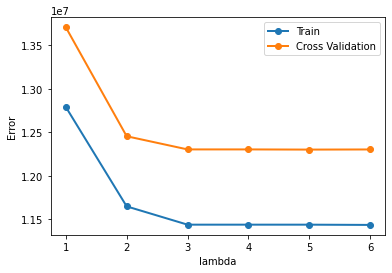

In [105]:
#lambda_vec, error_train, error_val = degreeCurve(X, y, X_CV, y_CV)

pyplot.plot(p_vec, error_train, '-o', p_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

#### Selecting $\lambda$ using a cross validation set

We first need to normalize our features for the test, training and CV set

In [68]:
p = 3

X_not_norm__for_poly = np.array(X_not_norm).reshape(np.array(X_not_norm).size,1)
# Map X onto Polynomial Features 
X_not_norm_poly = polyFeatures(X_not_norm__for_poly, p)
print(X_not_norm_poly)

# normalize features
mu = np.mean(X_not_norm_poly, axis = 0)
sigma = np.std(X_not_norm_poly, axis = 0)
X_poly_norm = (X_not_norm_poly - mu) / sigma
print(X_poly_norm)
X_poly_norm_with_ones = np.concatenate([np.ones((m, 1)), X_poly_norm], axis=1)
print(X_poly_norm_with_ones)

#do the same for X_test
X_test = np.array(X_test).reshape(np.array(X_test).size,1)
X_poly_test = polyFeatures(X_test, p)
mu_poly_test = np.mean(X_poly_test, axis = 0)
sigma_poly_test = np.std(X_poly_test, axis = 0)
X_poly_test_norm = (X_poly_test - mu_poly_test) / sigma_poly_test
X_poly_test_norm_ones = np.concatenate([np.ones((m_test, 1)), X_poly_test_norm], axis=1) #concatenate ones

#do the same for X_CV
X_CV = np.array(X_CV).reshape(np.array(X_CV).size,1)
X_poly_CV = polyFeatures(X_CV, p)
mu_poly_CV = np.mean(X_poly_CV, axis = 0)
sigma_poly_CV = np.std(X_poly_CV, axis = 0)
X_poly_CV_norm = (X_poly_CV - mu_poly_CV) / sigma_poly_CV
X_poly_CV_norm_ones = np.concatenate([np.ones((m_CV, 1)), X_poly_CV_norm], axis=1) #concatenate ones


[[1.00000000e+03 1.00000000e+06 1.00000000e+09]
 [1.23000000e+04 1.51290000e+08 1.86086700e+12]
 [8.02400000e+03 6.43845760e+07 5.16621838e+11]
 ...
 [2.58400000e+03 6.67705600e+06 1.72535127e+10]
 [1.50670000e+04 2.27014489e+08 3.42042731e+12]
 [1.43660000e+04 2.06381956e+08 2.96488318e+12]]
[[-1.00257689 -0.50072642 -0.25961901]
 [-0.04833028 -0.25393062 -0.21328843]
 [-0.40942395 -0.39664067 -0.24677451]
 ...
 [-0.86881347 -0.49140395 -0.25921412]
 [ 0.18533347 -0.12958112 -0.1744387 ]
 [ 0.1261364  -0.16346243 -0.18578662]]
[[ 1.         -1.00257689 -0.50072642 -0.25961901]
 [ 1.         -0.04833028 -0.25393062 -0.21328843]
 [ 1.         -0.40942395 -0.39664067 -0.24677451]
 ...
 [ 1.         -0.86881347 -0.49140395 -0.25921412]
 [ 1.          0.18533347 -0.12958112 -0.1744387 ]
 [ 1.          0.1261364  -0.16346243 -0.18578662]]


lambda		Train Error	Validation Error
 0.000000	11440655.994755	12304108.714307
 0.001000	11440655.997187	12304115.693971
 0.003000	11440656.016634	12304129.660829
 0.010000	11440656.237659	12304178.624554
 0.030000	11440658.175856	12304319.201271
 0.100000	11440680.034903	12304819.058212
 0.300000	11440867.474503	12306311.933778
 1.000000	11442829.792353	12312203.450317
 3.000000	11456566.234006	12332978.160942
 10.000000	11538858.231802	12417795.404993


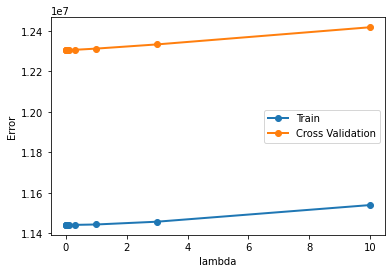

In [70]:
lambda_vec, error_train, error_val = validationCurve(X_poly_norm_with_ones, y, X_poly_CV_norm_ones, y_CV)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

#### Polynomial regression with our chosen $\lambda$ 

[26368.50556219 -9320.65356658  8215.37085814 -3031.98052807]


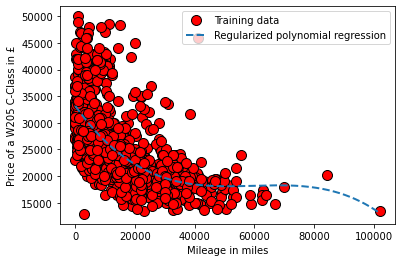

In [69]:
lambda_ = 0
theta_poly = trainLinearReg(linearRegCostFunction, X_poly_norm_with_ones, y,
                             lambda_=lambda_, maxiter=100000)
#theta_poly = theta_poly.reshape(1,-1)
#print(theta_poly.shape)
print(theta_poly)
h = hypothesis(X_poly_norm_with_ones[:,1].reshape(-1,1),theta_poly)
#print(h.tolist())

plotData(X_not_norm_stacked[:, 1], y)
#pyplot.plot(X_not_norm_stacked[:, 1], np.dot(X_poly_norm_with_ones, theta_poly), '-')
plotFit(polyFeatures, np.min(X_not_norm__for_poly), np.max(X_not_norm__for_poly), mu, sigma, theta_poly, p)
pyplot.legend(['Training data', 'Regularized polynomial regression']);
#print(hypothesis(X_not_norm_stacked[:,1], theta_poly))

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	194355604.040515
  	2		0.000000	16920651.149997
  	3		0.000000	103726377.734668
  	4		0.000311	487336254960.761536
  	5		754828.733070	1480340327.889513
  	6		868156.546919	1123101745.439602
  	7		783716.008120	1209058891.736372
  	8		828156.307014	216001238.569746
  	9		739107.054842	191386937.115060
  	10		888917.617153	14581355.913611
  	11		1034204.825614	12904132.407865
  	12		956171.342931	12649188.508007
  	13		1310508.769169	14482254.553760
  	14		2189844.458453	20148525.430767
  	15		2247281.591789	16274124.054390
  	16		2112090.131610	16455458.436897
  	17		5696203.461984	14858288.645597
  	18		5403292.973186	14942805.632114
  	19		5168213.769906	14878473.460495
  	20		5300663.053990	12982601.194534
  	21		5048521.880310	12987036.623432
  	22		4819612.049078	12933903.873078
  	23		4633036.976961	12661674.538717
  	24		5225978.845275	12862985.733123
  	25		5407545.9

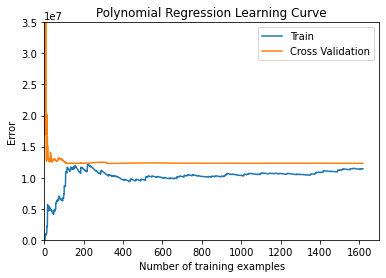

In [27]:
lambda_ = 0

pyplot.figure()
error_train_poly, error_val_poly = learningCurve(X_poly_norm_with_ones, y, X_poly_CV_norm_ones, y_CV, lambda_ )
pyplot.plot(np.arange(1, 1+m), error_train_poly, np.arange(1, 1+m), error_val_poly)

pyplot.title('Polynomial Regression Learning Curve')
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 1700, 0, 35000000])
pyplot.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train_poly[i], error_val_poly[i]))

Determining the R¬≤ Value:

In [28]:
y_pred_poly = np.dot(X_poly_norm_with_ones, theta_poly)
#print(y_pred_poly)
#print(y)
print("R¬≤ for polynomial model:",r2_score(y, y_pred_poly))

R¬≤ for polynomial model: 0.45386963076303555


Price prediction:

In [29]:
X_prediction = [1, 75000, 75000**2, 75000**3] #for a car with 75 000 miles
X_prediction[1:4] = (X_prediction[1:4] - mu) / sigma
#print(np.array(X_prediction).shape)
price = np.dot(X_prediction, theta_poly)
print(price)

18149.618642485148


# Price prediction of specific brand: Mercedes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

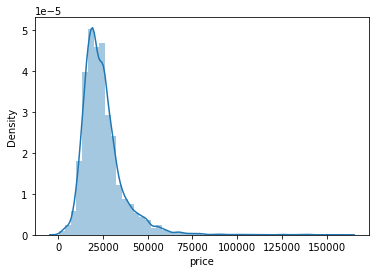

In [30]:
sbn.distplot(mercedes["price"])

Niet goed, we gaan proberen te filteren van 0-  60 000 :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

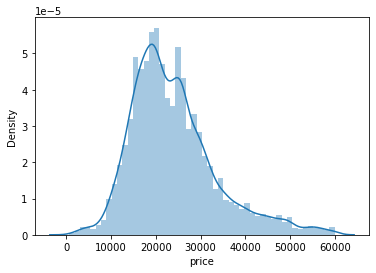

In [31]:
mercedes = mercedes.loc[(mercedes['price'] >= 0) & (mercedes['price'] <= 60000)]
sbn.distplot(mercedes["price"])

Data inladen en categorical variabelen fixen:

In [32]:
data_mercedes_expanded = pd.get_dummies(mercedes)
data_mercedes_expanded.drop('brand_mercedes', axis=1, inplace=True)
data_mercedes_expanded.head()

year  price  mileage  tax   mpg  engineSize  model_ A Class  \
0  2005   5200    63000  325  32.1         1.8               0   
1  2017  34948    27000   20  61.4         2.1               0   
2  2016  49948     6200  555  28.0         5.5               0   
6  2018  30948    16000  145  47.9         2.1               0   
7  2012  10948   107000  265  36.7         3.5               0   

   model_ B Class  model_ C Class  model_ CL Class  ...  model_220  model_230  \
0               0               0                0  ...          0          0   
1               0               0                0  ...          0          0   
2               0               0                0  ...          0          0   
6               0               0                0  ...          0          0   
7               0               0                0  ...          0          0   

   transmission_Automatic  transmission_Manual  transmission_Other  \
0                       1                    0                   0   
1                       1                    0                   0   
2                       1                    0                   0   
6                       1                    0                   0   
7                       1                    0                   0   

   transmission_Semi-Auto  fuelType_Diesel  fuelType_Hybrid  fuelType_Other  \
0                       0                0                0               0   
1                       0                0                1               0   
2                       0                0                0               0   
6                       0                1                0               0   
7                       0                0                0               0   

   fuelType_Petrol  
0                1  
1                0  
2                1  
6                0  
7                1  

[5 rows x 41 columns]

Data normaliseren:

In [33]:
mercedes_expanded_numpy = data_mercedes_expanded.to_numpy()
print("Numpy dataset: \n",mercedes_expanded_numpy)
print("\nShape dataset: ",mercedes_expanded_numpy.shape)

mu_mercedes = np.mean(mercedes_expanded_numpy, axis=0)
#print(mu_mercedes)
sigma_mercedes = np.std(mercedes_expanded_numpy, axis=0)
#print(sigma_mercedes)
mercedes_expanded_numpy_norm = (mercedes_expanded_numpy - mu_mercedes) / sigma_mercedes
print("\nNormalized Mercedes dataset: \n",mercedes_expanded_numpy_norm)

Numpy dataset: 
 [[2.0050e+03 5.2000e+03 6.3000e+04 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0170e+03 3.4948e+04 2.7000e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 4.9948e+04 6.2000e+03 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [2.0190e+03 3.0999e+04 1.1612e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0190e+03 3.7990e+04 2.4260e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0190e+03 5.4999e+04 2.0750e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]

Shape dataset:  (12943, 41)

Normalized Mercedes dataset: 
 [[-5.5063881  -1.94899173  1.92461731 ... -0.1163932  -0.02326211
   1.61036689]
 [-0.12362107  1.14474363  0.22662574 ...  8.59156731 -0.02326211
  -0.6209765 ]
 [-0.57218499  2.70471507 -0.75443605 ... -0.1163932  -0.02326211
   1.61036689]
 ...
 [ 0.77350677  0.73405515 -0.49917132 ... -0.1163932  -0.02326211
  -0.6209765 ]
 [ 0.77350677  1.46110583 -0.93244217 ... -0.1163932  -0.02326211
  -0.6209765 ]
 [ 0.77350677  3.23000945 -0.94899759 ... -0.1163932  -0.02326211
  

Selecting how much features and which features to be selected:

In [34]:
column_names_mercedes = data_mercedes_expanded.drop(columns = ['price']).columns
print(column_names_mercedes)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A Class',
       'model_ B Class', 'model_ C Class', 'model_ CL Class',
       'model_ CLA Class', 'model_ CLC Class', 'model_ CLK',
       'model_ CLS Class', 'model_ E Class', 'model_ G Class',
       'model_ GL Class', 'model_ GLA Class', 'model_ GLB Class',
       'model_ GLC Class', 'model_ GLE Class', 'model_ GLS Class',
       'model_ M Class', 'model_ R Class', 'model_ S Class', 'model_ SL CLASS',
       'model_ SLK', 'model_ V Class', 'model_ X-CLASS', 'model_180',
       'model_200', 'model_220', 'model_230', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')


(12943, 40)
(12943,)
(12943, 41)


Text(0.5, 0, 'number of features')

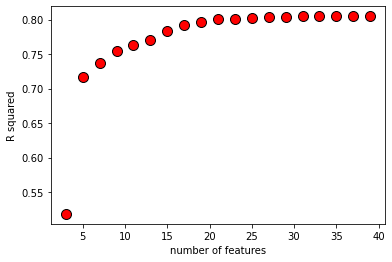

In [35]:
#data
X_mercedes = np.delete(mercedes_expanded_numpy_norm, 1, axis=1)
y_mercedes = mercedes_expanded_numpy_norm[:,1]
print(X_mercedes.shape)
print(y_mercedes.shape)
print(mercedes_expanded_numpy_norm.shape)


#for features
no_of_features = []
r_squared = []


for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k = k)
    X_transformed = selector.fit_transform(X_mercedes, y_mercedes)
    regressor = LinearRegression()
    regressor.fit(X_transformed, y_mercedes)
    no_of_features.append(k)
    teller = (1-(regressor.score(X_transformed, y_mercedes)))*(y_mercedes.size-1)
    noemer = y_mercedes.size-1
    r_squared.append(1-(teller/noemer))

fig = pyplot.figure()  # open a new figure    
pyplot.plot(no_of_features, r_squared, 'ro', ms=10, mec='k')
pyplot.ylabel('R squared')
pyplot.xlabel('number of features')   


In [36]:
selector = SelectKBest(f_regression, k = 20)
X_train_transformed = selector.fit_transform(X_mercedes, y_mercedes)
features_columns = column_names_mercedes[selector.get_support()]
print(features_columns.to_numpy().tolist())

['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A Class', 'model_ B Class', 'model_ E Class', 'model_ GLA Class', 'model_ GLC Class', 'model_ GLE Class', 'model_ GLS Class', 'model_ S Class', 'model_ SL CLASS', 'model_ SLK', 'model_ V Class', 'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol']


In [37]:
data_mercedes_expanded_filtered = data_mercedes_expanded[features_columns.to_numpy().tolist()]
data_mercedes_expanded_filtered.head()

year  mileage  tax   mpg  engineSize  model_ A Class  model_ B Class  \
0  2005    63000  325  32.1         1.8               0               0   
1  2017    27000   20  61.4         2.1               0               0   
2  2016     6200  555  28.0         5.5               0               0   
6  2018    16000  145  47.9         2.1               0               0   
7  2012   107000  265  36.7         3.5               0               0   

   model_ E Class  model_ GLA Class  model_ GLC Class  model_ GLE Class  \
0               0                 0                 0                 0   
1               0                 0                 0                 0   
2               0                 0                 0                 0   
6               0                 0                 0                 1   
7               0                 0                 0                 0   

   model_ GLS Class  model_ S Class  model_ SL CLASS  model_ SLK  \
0                 0               0                0           1   
1                 0               1                0           0   
2                 0               0                1           0   
6                 0               0                0           0   
7                 0               1                0           0   

   model_ V Class  transmission_Manual  transmission_Semi-Auto  \
0               0                    0                       0   
1               0                    0                       0   
2               0                    0                       0   
6               0                    0                       0   
7               0                    0                       0   

   fuelType_Diesel  fuelType_Petrol  
0                0                1  
1                0                0  
2                0                1  
6                1                0  
7                0                1

Normalise features and convert to numpy:

In [38]:
mercedes_expanded_goodfeatures_numpy = data_mercedes_expanded_filtered.to_numpy()
print(mercedes_expanded_goodfeatures_numpy)

#normalize
mu_mercedes_features = np.mean(mercedes_expanded_goodfeatures_numpy, axis=0)
#print(mu_mercedes)
sigma_mercedes_features = np.std(mercedes_expanded_goodfeatures_numpy, axis=0)
#print(sigma_mercedes)
mercedes_expanded_features_norm = (mercedes_expanded_goodfeatures_numpy - mu_mercedes_features) / sigma_mercedes_features
print("\nNormalized Mercedes dataset: \n",mercedes_expanded_features_norm)

[[2.0050e+03 6.3000e+04 3.2500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0170e+03 2.7000e+04 2.0000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 6.2000e+03 5.5500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [2.0190e+03 1.1612e+04 1.4500e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0190e+03 2.4260e+03 1.4500e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0190e+03 2.0750e+03 1.4500e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]]

Normalized Mercedes dataset: 
 [[-5.5063881   1.92461731  2.99362037 ... -1.04270993 -1.55636222
   1.61036689]
 [-0.12362107  0.22662574 -1.67964527 ... -1.04270993 -1.55636222
  -0.6209765 ]
 [-0.57218499 -0.75443605  6.51772233 ... -1.04270993 -1.55636222
   1.61036689]
 ...
 [ 0.77350677 -0.49917132  0.23562754 ... -1.04270993  0.64252395
  -0.6209765 ]
 [ 0.77350677 -0.93244217  0.23562754 ... -1.04270993  0.64252395
  -0.6209765 ]
 [ 0.77350677 -0.94899759  0.23562754 ... -1.04270993  0.64252395
  -0.6209765 ]]


Paste 1's before continueing:

In [39]:
m_merc = y_mercedes.size #dataset size
X_multi_not_norm = np.concatenate([np.ones((m_merc, 1)), mercedes_expanded_goodfeatures_numpy], axis=1)
X_multi_merc = np.concatenate([np.ones((m_merc, 1)), mercedes_expanded_features_norm], axis=1)
print(X_multi_merc)
#print(mercedes_expanded_features_norm.shape)
#print(m_merc)


[[ 1.         -5.5063881   1.92461731 ... -1.04270993 -1.55636222
   1.61036689]
 [ 1.         -0.12362107  0.22662574 ... -1.04270993 -1.55636222
  -0.6209765 ]
 [ 1.         -0.57218499 -0.75443605 ... -1.04270993 -1.55636222
   1.61036689]
 ...
 [ 1.          0.77350677 -0.49917132 ... -1.04270993  0.64252395
  -0.6209765 ]
 [ 1.          0.77350677 -0.93244217 ... -1.04270993  0.64252395
  -0.6209765 ]
 [ 1.          0.77350677 -0.94899759 ... -1.04270993  0.64252395
  -0.6209765 ]]


Some functions to compute cost and gradient descent for multiple features:

In [40]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    # ==================================================================
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history


In [41]:
"""
# initialize fitting parameters
theta_multivariate_merc = np.zeros(26)

# some gradient descent settings
iterations = 100000
alpha = 0.1

theta_multivariate_merc, J_history_multi = gradientDescentMulti(X_multi_merc ,y_mercedes, theta_multivariate_merc, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta_multivariate_merc))

lambda_ = 0
theta_multi = trainLinearReg(computeCostMulti, X_multi_merc, y_mercedes,
                             lambda_=lambda_, maxiter=1000)
print(theta_multi)
"""


# Choose some alpha value - change this
alpha = 0.01
num_iters = 200

# init theta and run gradient descent
theta_multi = np.zeros(21)
theta_multi, J_history = gradientDescentMulti(X_multi_merc, y_mercedes, theta_multi, alpha, num_iters)
print(theta_multi)


[-6.41239292e-15  3.40073704e-01 -2.92459951e-01  2.34944073e-02
 -1.37435879e-01  2.53532602e-01 -9.72522085e-02 -7.81704277e-02
  4.40122943e-02 -6.42395964e-02  1.23822950e-01  1.74994981e-01
  7.98725525e-02  1.04869678e-01  2.03457748e-02 -2.56961932e-02
  7.62898742e-02 -8.10407121e-02  2.64164313e-02 -4.27133106e-02
  5.05792399e-03]


-0.15769658057390268


Text(0, 0.5, 'Cost J')

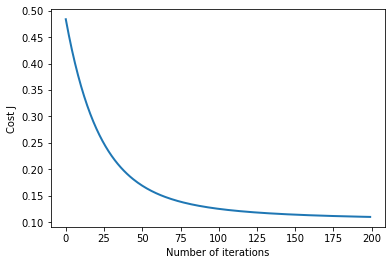

In [42]:
#['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A Class', 
#'model_ B Class', 'model_ E Class', 'model_ GLA Class', 'model_ GLC Class', 
#'model_ GLE Class', 'model_ GLS Class', 'model_ S Class', 
#'model_ SL CLASS', 'model_ SLK', 'model_ V Class', 
#'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel', 
#'fuelType_Petrol']
X_prediction = [1, 2019, 9573, 145, 45.6, 1.3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 
X_prediction[1:21] = (X_prediction[1:21] - mu_mercedes_features) / sigma_mercedes_features
#print(np.array(X_prediction).shape)
price = np.dot(X_prediction, theta_multi)
print(price)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [43]:
def regression_model(model):
    regressor = model
    regressor.fit(X_multi_merc, y_mercedes)
    score = regressor.score(X_multi_merc, y_mercedes)
    return regressor, score

In [44]:
#regressor, score = regression_model(LinearRegression())

y_pred = np.dot(X_multi_merc, theta_multi)
score = r2_score(y_mercedes, y_pred)


print(score)

0.7806066033871836


In [45]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    # =================================================================
    return theta

In [46]:
# Calculate the parameters from the normal equation
theta = normalEqn(X_multi_not_norm, y_mercedes);

# Display normal equation's result
print(theta);

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

#['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A Class', 
#'model_ B Class', 'model_ E Class', 'model_ GLA Class', 'model_ GLC Class', 
#'model_ GLE Class', 'model_ GLS Class', 'model_ S Class', 
#'model_ SL CLASS', 'model_ SLK', 'model_ V Class', 
#'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel', 
#'fuelType_Petrol']

X_prediction = [1, 2019, 9573, 145, 45.6, 1.3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 
X_prediction[1:21] = (X_prediction[1:21] - mu_mercedes_features) / sigma_mercedes_features
price = np.dot(X_prediction, theta) # You should change this

# ============================================================

print(price)

[-3.72036039e+02  1.85055445e-01 -1.32789040e-05 -7.34021273e-04
 -1.67672030e-02  5.92768168e-01 -1.38983191e-01 -3.26165722e-01
  1.82250494e-01 -2.11165391e-01  4.97504607e-01  9.33840928e-01
  1.09155601e+00  9.40581112e-01  1.71780862e-01  1.40802295e-01
  5.79757836e-01 -2.03989070e-01  9.66851482e-03 -1.23823593e+00
 -1.22184394e+00]
-374.7548442625902
